In [ ]:
# Place the Google Drive Sharing link
file_share_link = "https://drive.google.com/file/d/10V7bjvjfFv2lZ4spwOBRKlCIZSBTJOQR/view?usp=sharing"

# extract the ID of the file
file_id = file_share_link[file_share_link.find("d/")+2 : file_share_link.find("/v")]
print(file_id)
!gdown "$file_id" # Download the data from Google Drive

10V7bjvjfFv2lZ4spwOBRKlCIZSBTJOQR
Downloading...
From: https://drive.google.com/uc?id=10V7bjvjfFv2lZ4spwOBRKlCIZSBTJOQR
To: /content/admission_student.csv
100% 1.06M/1.06M [00:00<00:00, 117MB/s]


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
df =  pd.read_csv('admission_student.csv',header=None)
col=['parents','has_nurs','form','children','housing','finance','social','health','NURSERY']
df.columns = col

In [ ]:
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,NURSERY
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   NURSERY   12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [ ]:
df.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
NURSERY     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


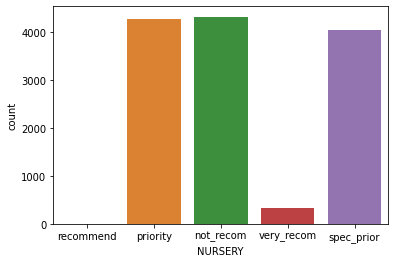

In [ ]:
sns.countplot(df.NURSERY,saturation=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


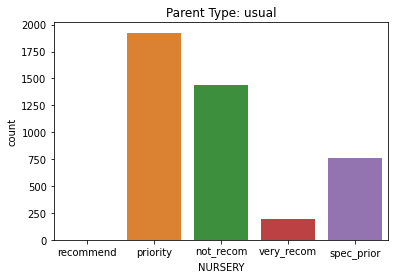

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


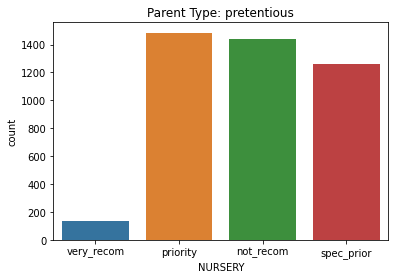

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


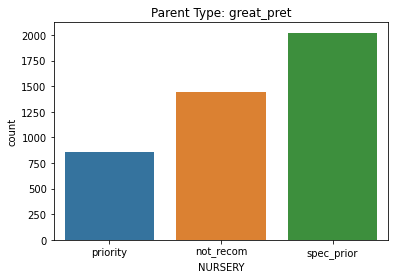

In [ ]:
for i in df.parents.unique():
 temp=df[df.parents==i]
 sns.countplot(temp.NURSERY,saturation=0.7)
 plt.title('Parent Type: %s'%i)
 plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


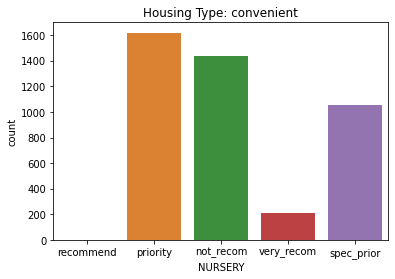

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


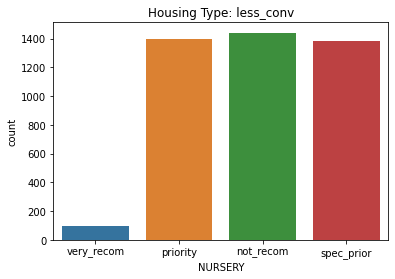

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


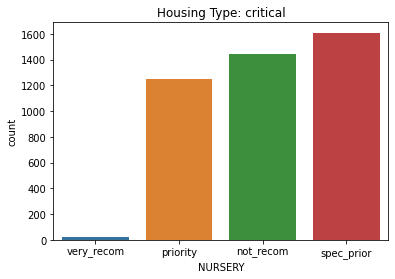

In [ ]:
for i in df.housing.unique():
 temp=df[df.housing==i]
 sns.countplot(temp.NURSERY,saturation=0.7)
 plt.title('Housing Type: %s'%i)
 plt.show()


In [ ]:
X = df.drop(columns = "NURSERY")
y = df['NURSERY']
X_dum = pd.get_dummies(X,drop_first=True)
X_dum.head()

,parents_pretentious,parents_usual,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_completed,form_foster,form_incomplete,children_2,children_3,children_more,housing_critical,housing_less_conv,finance_inconv,social_problematic,social_slightly_prob,health_priority,health_recommended
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_dum,y,test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()

log.fit(X_train,y_train)

y_pred = log.predict(X_test)

accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9243827160493827